# Athlete in 120 years

## 2024-25 Group: 12

This is the MN5813 Group Assigment from Group 12.

* Student 1 ID
* Student 2 ID
* Student 3 ID




## Project summary

## Generative AI

## Introduction

## Setup

### Import necessary libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load data

In [8]:
athlete_events = pd.read_csv("/Users/chaule/Desktop/Group assessment/archive/athlete_events.csv")
noc_regions = pd.read_csv("/Users/chaule/Desktop/Group assessment/archive/noc_regions.csv")

### Convert into DataFrame

In [10]:
athlete_events_df = pd.DataFrame(athlete_events)
noc_regions_df = pd.DataFrame(noc_regions)

In [11]:
#merge table
report_df = pd.merge(athlete_events_df,noc_regions_df, on="NOC", how="left")

In [12]:
report_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [13]:
report_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  region  270746 non-null  object 
 16  notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 35.2+ MB


## Data Management

### Data cleaning

In [15]:
report_df.dropna()
report_df['Medal'] = report_df['Medal'].fillna('No Medal')
report_df[['region','notes']] = report_df[['region','notes']].fillna('No data')
report_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal,China,No data
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal,China,No data
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No Medal,Denmark,No data
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,No data
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No Medal,Netherlands,No data


In [16]:
report_df.isnull().sum()

ID            0
Name          0
Sex           0
Age        9474
Height    60171
Weight    62875
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal         0
region        0
notes         0
dtype: int64

In [17]:
report_df.duplicated().sum()

1385

In [18]:
report_df = report_df.drop_duplicates()
report_df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal,China,No data
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal,China,No data
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No Medal,Denmark,No data
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,No data
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No Medal,Netherlands,No data
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,No Medal,Poland,No data
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",No Medal,Poland,No data
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",No Medal,Poland,No data
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,No Medal,Poland,No data


In [19]:
report_df = report_df.astype({'Year':'str'})
report_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 269731 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      269731 non-null  int64  
 1   Name    269731 non-null  object 
 2   Sex     269731 non-null  object 
 3   Age     260416 non-null  float64
 4   Height  210917 non-null  float64
 5   Weight  208204 non-null  float64
 6   Team    269731 non-null  object 
 7   NOC     269731 non-null  object 
 8   Games   269731 non-null  object 
 9   Year    269731 non-null  object 
 10  Season  269731 non-null  object 
 11  City    269731 non-null  object 
 12  Sport   269731 non-null  object 
 13  Event   269731 non-null  object 
 14  Medal   269731 non-null  object 
 15  region  269731 non-null  object 
 16  notes   269731 non-null  object 
dtypes: float64(3), int64(1), object(13)
memory usage: 37.0+ MB


### Data wrangling

In [21]:
report_df["Age_range"] = pd.cut(report_df["Age"], bins=[0,18,25,35,100], labels=["0 - 18", "19 - 25", "26 - 35", "36 +"])
report_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Age_range
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal,China,No data,19 - 25
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal,China,No data,19 - 25
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No Medal,Denmark,No data,19 - 25
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,No data,26 - 35
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No Medal,Netherlands,No data,19 - 25


In [22]:
report_df["Organiser"] = report_df["City"] + "_" + report_df["Year"]
report_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Age_range,Organiser
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal,China,No data,19 - 25,Barcelona_1992
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal,China,No data,19 - 25,London_2012
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No Medal,Denmark,No data,19 - 25,Antwerpen_1920
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,No data,26 - 35,Paris_1900
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No Medal,Netherlands,No data,19 - 25,Calgary_1988


In [23]:
report_df['Discipline'] = report_df['Event'].str.split(r"(Men's|Women's)", n=1, expand=True)[2]
report_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Age_range,Organiser,Discipline
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal,China,No data,19 - 25,Barcelona_1992,Basketball
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal,China,No data,19 - 25,London_2012,Extra-Lightweight
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No Medal,Denmark,No data,19 - 25,Antwerpen_1920,Football
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,No data,26 - 35,Paris_1900,Tug-Of-War
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No Medal,Netherlands,No data,19 - 25,Calgary_1988,500 metres


In [24]:
report_df = report_df.astype({'Year':'int'})
report_df['Century'] = pd.cut(report_df["Year"], bins=[0, 1901, 2001, 3000], labels=["19th","20th","21st"])
report_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,...,City,Sport,Event,Medal,region,notes,Age_range,Organiser,Discipline,Century
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,...,Barcelona,Basketball,Basketball Men's Basketball,No Medal,China,No data,19 - 25,Barcelona_1992,Basketball,20th
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,...,London,Judo,Judo Men's Extra-Lightweight,No Medal,China,No data,19 - 25,London_2012,Extra-Lightweight,21st
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,...,Antwerpen,Football,Football Men's Football,No Medal,Denmark,No data,19 - 25,Antwerpen_1920,Football,20th
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,...,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,No data,26 - 35,Paris_1900,Tug-Of-War,19th
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,...,Calgary,Speed Skating,Speed Skating Women's 500 metres,No Medal,Netherlands,No data,19 - 25,Calgary_1988,500 metres,20th


### Data analysis

In [26]:
average_age = report_df.groupby(['Sport','Sex'])['Age'].agg(['mean', 'min', 'max', 'count']).sort_values(by='mean', ascending=False)

average_age

mean   min   max  count
Sport               Sex                              
Roque               M    53.333333  37.0  64.0      3
Art Competitions    M    44.798122  14.0  97.0   1704
                    F    43.972067  17.0  74.0    179
Alpinism            F    43.000000  43.0  43.0      1
Croquet             F    39.500000  33.0  46.0      4
...                            ...   ...   ...    ...
Ski Jumping         F    21.266667  15.0  30.0     30
Figure Skating      F    20.812554  11.0  43.0   1163
Swimming            F    19.487450  11.0  41.0   9761
Gymnastics          F    19.232751  11.0  41.0   9044
Rhythmic Gymnastics F    18.737082  13.0  30.0    658

[116 rows x 4 columns]

In [27]:
average_age = report_df.groupby(['Name','Age'])['Age'].max()
average_age = average_age.sort_values(ascending=False)
average_age

Name                             Age 
John Quincy Adams Ward           97.0    97.0
Winslow Homer                    96.0    96.0
Thomas Cowperthwait Eakins       88.0    88.0
George Denholm Armour            84.0    84.0
Robert Tait McKenzie             81.0    81.0
                                         ... 
Carlos Bienvenido Front Barrera  11.0    11.0
Etsuko Inada                     11.0    11.0
Beatrice Hutiu                   11.0    11.0
Marcelle Matthews                11.0    11.0
Dimitrios Loundras               10.0    10.0
Name: Age, Length: 180604, dtype: float64

In [28]:
medal_count = report_df.groupby(['Sport', 'Name','Sex','Age'])['Medal'].count()

sorted_medal_count = medal_count.sort_values(ascending=False)

top_medalists = sorted_medal_count.groupby('Sport').head(1)

top_medalists.reset_index()

,Sport,Name,Sex,Age,Medal
0,Shooting,"Willis Augustus Lee, Jr.",M,31.0,15
1,Swimming,Mohamed Bin Abid,M,19.0,10
2,Gymnastics,George Louis Eyser,M,33.0,10
3,Athletics,Eric Otto Valdemar Lemming,M,26.0,8
4,Cycling,Marcus Latimer Hurley,M,20.0,7
...,...,...,...,...,...
61,Alpinism,Tom George Longstaff,M,49.0,1
62,Football,Sanah Modiehi Mollo,F,25.0,1
63,Handball,Abdel Ghani Loukil,M,23.0,1
64,Cricket,Philip Humphreys Tomalin,M,44.0,1


In [29]:
medals_by_country = report_df.pivot_table(
    index='region',    # Countries will be the rows
    columns='Medal',   # Medal types will be the columns
    aggfunc='size',    # Count the number of occurrences
    fill_value=0       # Fill missing values with 0 (for No Medal)
)

medals_by_country = medals_by_country.rename(columns={'Gold': 'Gold Medals', 
                                                      'Silver': 'Silver Medals', 
                                                      'Bronze': 'Bronze Medals', 
                                                      'No Medal': 'No Medal'})

medals_by_country['Total Medals'] = medals_by_country[['Gold Medals', 'Silver Medals', 'Bronze Medals']].sum(axis=1)
medals_by_country['Total Athletes'] = medals_by_country[['Total Medals', 'No Medal']].sum(axis=1)

medals_by_country = medals_by_country.sort_values(by='Total Medals', ascending=False)

column_order = ['Total Athletes','Total Medals','Gold Medals', 'Silver Medals', 'Bronze Medals', 'No Medal']

medals_by_country = medals_by_country[column_order]

print("\nTop countries by Medal Counts (Gold, Silver, Bronze, No Medal):")
medals_by_country.head(10)


Top countries by Medal Counts (Gold, Silver, Bronze, No Medal):


Medal,Total Athletes,Total Medals,Gold Medals,Silver Medals,Bronze Medals,No Medal
region,,,,,,
USA,18604,5637,2638,1641,1358,12967
Russia,11692,3947,1599,1170,1178,7745
Germany,15787,3756,1301,1195,1260,12031
UK,12115,2067,677,739,651,10048
France,12551,1767,499,602,666,10784
Italy,10668,1637,575,531,531,9031
Sweden,8291,1536,479,522,535,6755
Canada,9681,1352,463,438,451,8329
Australia,7723,1349,368,459,522,6374


### Data Visualisation

In [31]:
import seaborn as sns

In [32]:
plt.style.use("classic")

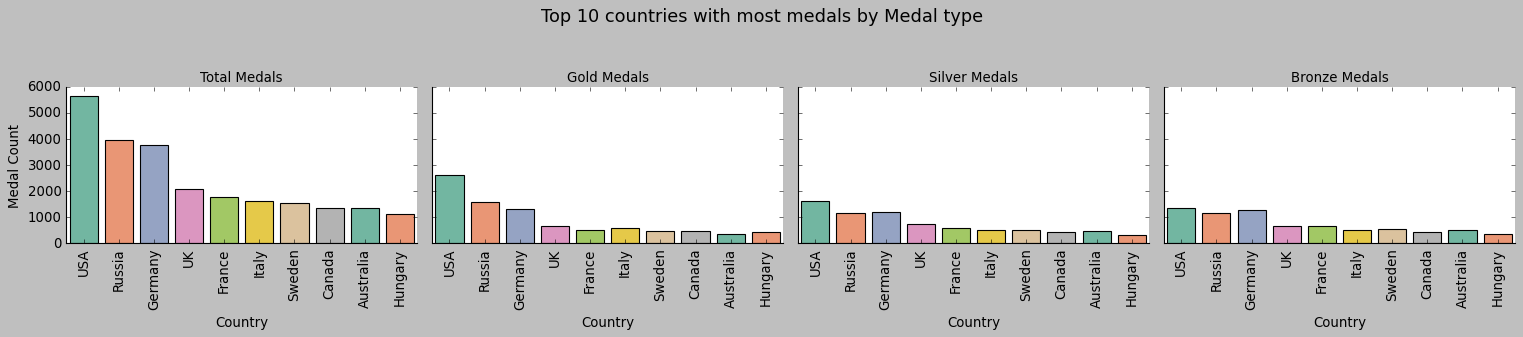

In [33]:
top_10_countries = medals_by_country.head(10)
medals_long = top_10_countries.reset_index().melt(id_vars="region", 
                                                   value_vars=["Total Medals", "Gold Medals", "Silver Medals", "Bronze Medals"],
                                                   var_name="Medal", 
                                                   value_name="Count")

g = sns.FacetGrid(medals_long, col="Medal", height=4, aspect=1.2)
g.map_dataframe(sns.barplot, x="region", y="Count", hue='region', palette="Set2", legend=False)

g.set_axis_labels("Country", "Medal Count")
g.set_titles("{col_name}")
g.fig.suptitle("Top 10 countries with most medals by Medal type", y=1.05, fontsize=16)

for ax in g.axes.flat:
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    
plt.tight_layout()
plt.show()

In [34]:
import hvplot.pandas

In [35]:
gender_count = report_df.groupby(['Year', 'Sex'])['ID'].count().reset_index()

gender_count = gender_count.rename(columns={'ID': 'Count'})

gender_distribution_plot = gender_count.hvplot.line(
    x='Year', 
    y='Count', 
    by='Sex', 
    xlabel='Year', 
    ylabel='Number of Athletes', 
    title='Athlete Distribution by Gender Over Time', 
    height=400, 
    width=800,
    line_width=2,
    legend='top'
)

gender_distribution_plot

:NdOverlay   [Sex]
   :Curve   [Year]   (Count)

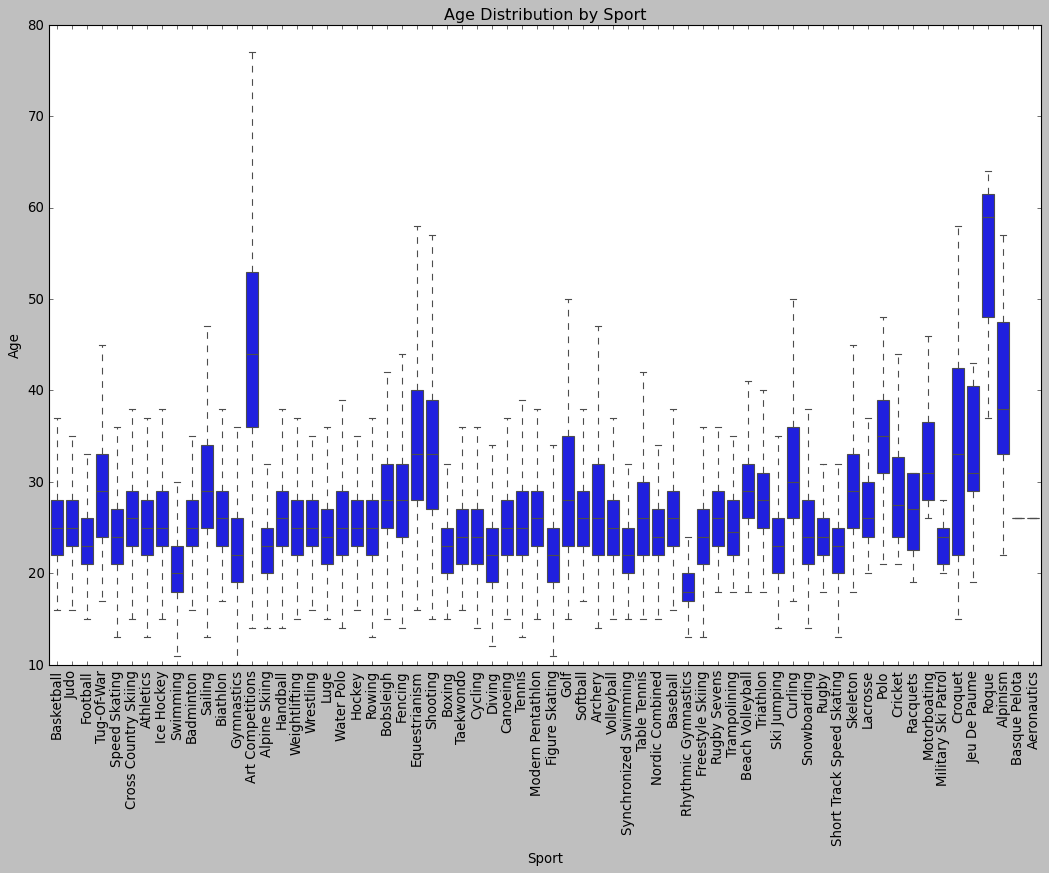

In [36]:
# Athlete Physical Trends by Sport
plt.figure(figsize=(16, 10))
# Boxplot to show distribution of Height by Sport
sns.boxplot(data=report_df, x='Sport', y='Age', showfliers=False)
plt.title('Age Distribution by Sport')
plt.xlabel('Sport')
plt.ylabel('Age')
plt.xticks(rotation=90)
plt.show()

### Data export

### Conclusion

### References